# Customer Churn Analysis Project

Problem description:
    
    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

    You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('Customer Churn Analysis.csv')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing required libraries

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Getting a basic outlook over the dataset

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1=df.drop('customerID',axis=1)

In [6]:
df1.shape

(7043, 20)

In [7]:
df1.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observations:
    
    1.Most of the columns are object type.

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Univariate Analysis

**Column 1: Gender**

In [11]:
df1['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
le.fit(df1['gender'])
label_gender=dict(zip(range(len(le.classes_)),le.classes_)) 

<AxesSubplot:xlabel='gender', ylabel='count'>

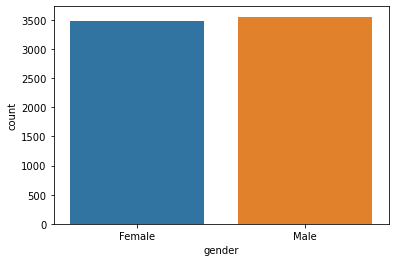

In [14]:
sns.countplot(df['gender'])

Observations:
    
    1.Both male and females are almost equal in numbers.

In [15]:
df1['gender']=le.fit_transform(df1['gender'])

**Column 2: SeniorCitizen**

In [16]:
df1['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

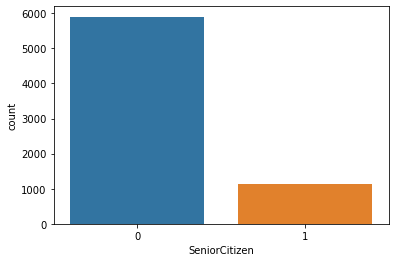

In [17]:
sns.countplot(df1['SeniorCitizen'])

Observations:
    
    1.There are less senior citizens.

**Column 3: Partner**

In [18]:
df1['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
le.fit(df1['Partner'])
label_Partner=dict(zip(range(len(le.classes_)),le.classes_)) 

In [20]:
df1['Partner']=le.fit_transform(df1['Partner'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

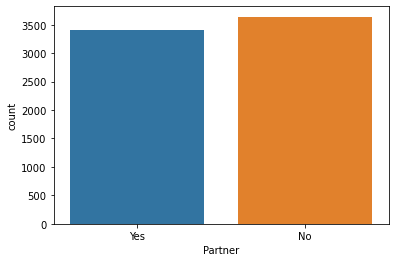

In [21]:
sns.countplot(df['Partner'])

Observations:
    
    1.Both the category partner with yes and partner with no are almost same in the number.

**Column 4: Dependents**

In [22]:
df1['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [23]:
le.fit(df1['Dependents'])
label_Dependents=dict(zip(range(len(le.classes_)),le.classes_)) 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

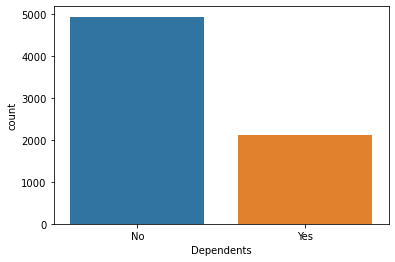

In [24]:
sns.countplot(df1['Dependents'])

Observations:
    
    1.Most of the population are with no dependents.

In [25]:
df1['Dependents']=le.fit_transform(df1['Dependents'])

**Column 5: tenure**

<AxesSubplot:>

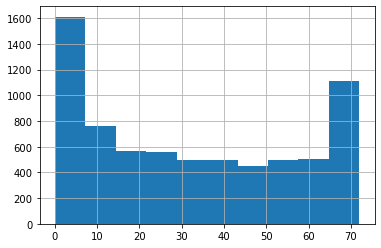

In [26]:
df1['tenure'].hist(grid=True)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

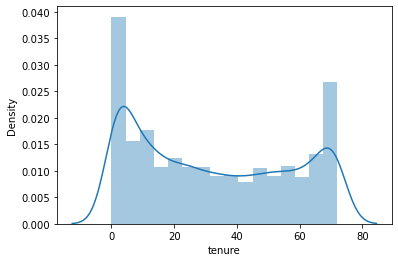

In [27]:
sns.distplot(df1['tenure'])

Observations:
    
    1.The tenure 0-7 are in highest frequency upto 1600 times ans second highest is 64 to 70 of 1100 times.

**column 6: PhoneService**

In [28]:
df1['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

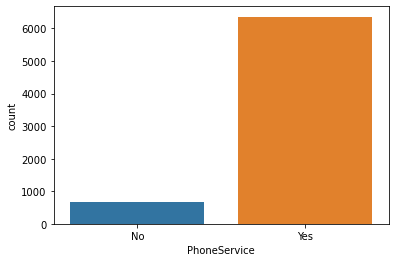

In [29]:
sns.countplot(df1['PhoneService'])

Observations:
    
    1.Most of the customer are available for the phone service.

In [30]:
le.fit(df1['PhoneService'])
label_PhoneService=dict(zip(range(len(le.classes_)),le.classes_)) 

In [31]:
df1['PhoneService']=le.fit_transform(df1['PhoneService'])

**Column 7: MultipleLines**

In [32]:
df1['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

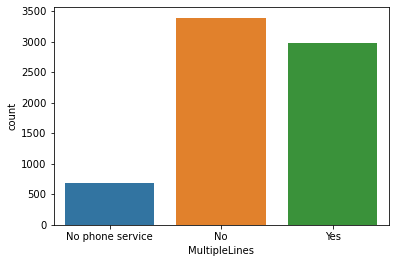

In [33]:
sns.countplot(df1['MultipleLines'])

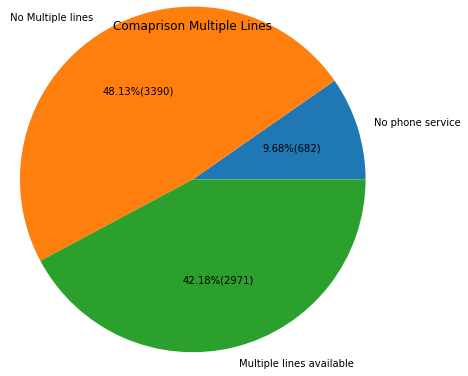

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No phone service',' No Multiple lines','Multiple lines available']
value=[682,3390,2971]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison Multiple Lines')
plt.show()

Observations:
    
    1.Around 42% of customer has multiple lines ans 48% has only one line.

In [35]:
import time
le.fit(df1['MultipleLines'])
label_MultipleLines=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['MultipleLines']=le.fit_transform(df1['MultipleLines'])

**Column 8: InternetService**

In [36]:
k=df1['InternetService'].value_counts()

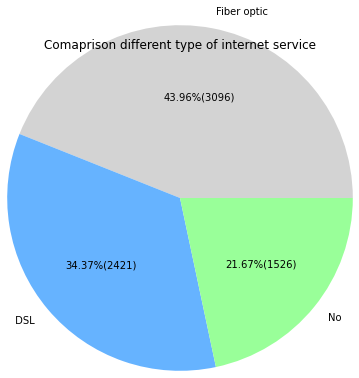

In [37]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Fiber optic',' DSL','No']
value=k
colors = ['lightgrey','#66b3ff','#99ff99']
ax.pie(value,labels=langs,colors=colors,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison different type of internet service')
plt.show()

Observations:
    
    1.We can see that most of the internet service is through optical fibre.

In [38]:
le.fit(df1['InternetService'])
label_InternetService=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['InternetService']=le.fit_transform(df1['InternetService'])

 **Column 9: OnlineSecurity**

In [39]:
df1['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

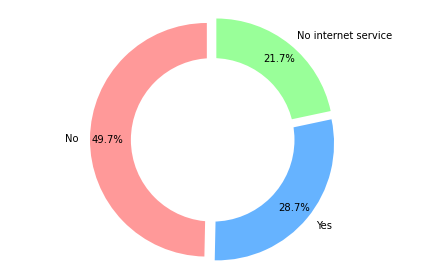

In [40]:
# Pie chart
labels = ['No', 'Yes', 'No internet service']
sizes = [3498, 2019, 1526]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Observations:
    
    1.We can see that 21.7% of customer has bo internet service,only 28.7% of the people has online security.

In [41]:
le.fit(df1['OnlineSecurity'])
label_OnlineSecurity=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['OnlineSecurity']=le.fit_transform(df1['OnlineSecurity'])

**Column 10: OnlineBackup**

In [42]:
df1['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

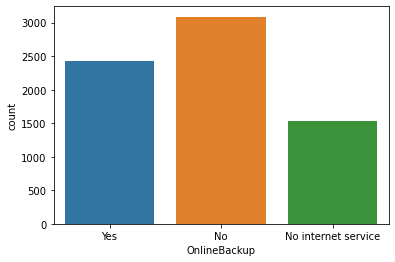

In [43]:
sns.countplot(df1['OnlineBackup'])

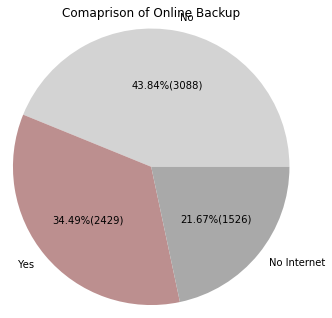

In [44]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No',' Yes','No Internet']
value=df1['OnlineBackup'].value_counts()
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of Online Backup')
plt.show()

Observations:
    
    1.We can see that only 34.39% of customers are with online backup.

In [45]:
le.fit(df1['OnlineBackup'])
label_OnlineBackup=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['OnlineBackup']=le.fit_transform(df1['OnlineBackup'])

**Column 11: DeviceProtection**

In [46]:
df1['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

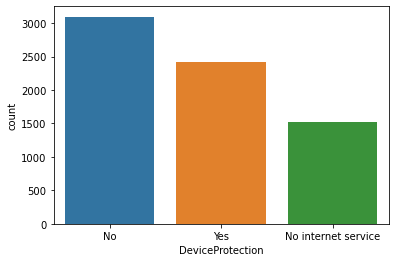

In [47]:
sns.countplot(df1['DeviceProtection'])

Observations:
    
    1.Majority of the people dont have divice protection.

In [48]:
le.fit(df1['DeviceProtection'])
label_DeviceProtection=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['DeviceProtection']=le.fit_transform(df1['DeviceProtection'])

**Column 12: TechSupport**

In [49]:
df1['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

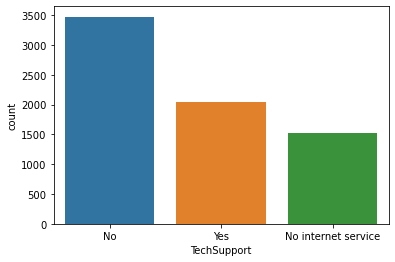

In [50]:
sns.countplot(df1['TechSupport'])

Observations:
    
    1.Majority of the people dont have tech support.

In [51]:
le.fit(df1['TechSupport'])
label_TechSupport=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['TechSupport']=le.fit_transform(df1['TechSupport'])

**Column 13: StreamingTV**

In [52]:
df1['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

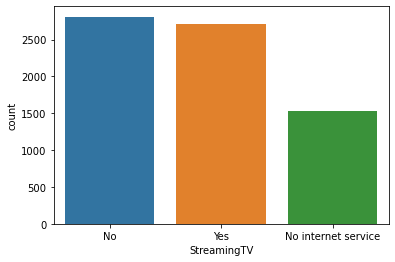

In [53]:
sns.countplot(df1['StreamingTV'])

Observations:
    
    1.We can see that significant propotion of population streams TV.

In [54]:
le.fit(df1['StreamingTV'])
label_StreamingTV=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['StreamingTV']=le.fit_transform(df1['StreamingTV'])

**Column 14: StreamingMovies**

In [55]:
df1['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

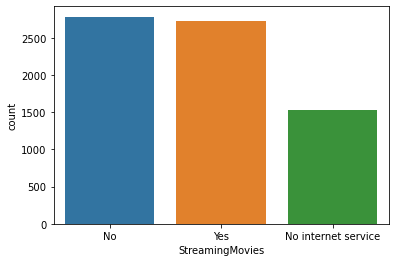

In [56]:
sns.countplot(df1['StreamingMovies'])

Observations:
    
    1.We can observe that significant percentage of population streams movies.

In [57]:
le.fit(df1['StreamingMovies'])
label_StreamingMovies=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['StreamingMovies']=le.fit_transform(df1['StreamingMovies'])

**Column 15: Contract**

In [58]:
df1['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

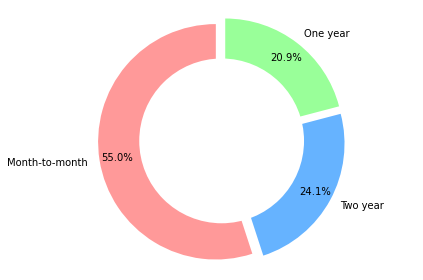

In [59]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Month-to-month', 'Two year', 'One year']
sizes = df1['Contract'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Observations:
    
    1.We can see that 55% of the customers have month to month contract,followed by Two years of 24.1%.

In [60]:
le.fit(df1['Contract'])
label_Contract=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['Contract']=le.fit_transform(df1['Contract'])

**Column 16: PaperlessBilling**

In [61]:
df1['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

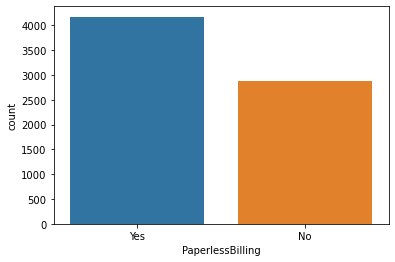

In [62]:
sns.countplot(df1['PaperlessBilling'])

Observations:
    
    1.Majority of the customers have paper less billing.

In [63]:
le.fit(df1['PaperlessBilling'])
label_PaperlessBilling=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['PaperlessBilling']=le.fit_transform(df1['PaperlessBilling'])

**Column 17: PaymentMethod**

In [64]:
df1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

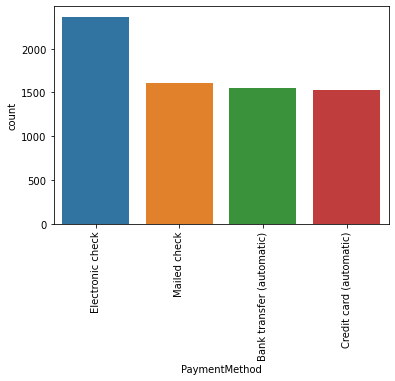

In [65]:
count1=sns.countplot(df1['PaymentMethod'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)

Observations:
    
    1.Majority of the people use electronic check,then the remaining category mailed check,bank transfer,credit card are used by remaining customer in equal propotion.

In [66]:
le.fit(df1['PaymentMethod'])
label_PaymentMethod=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df1['PaymentMethod']=le.fit_transform(df1['PaymentMethod'])

**Column 18:MonthlyCharges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

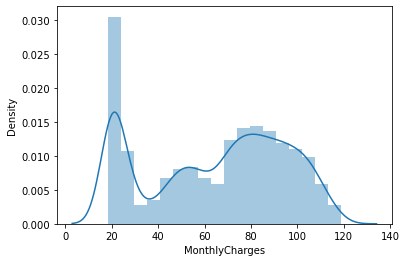

In [67]:
sns.distplot(df1['MonthlyCharges'])

<AxesSubplot:>

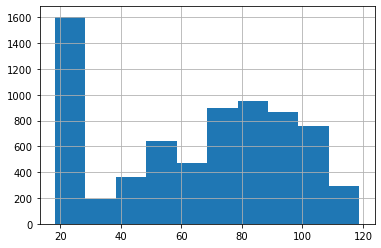

In [68]:
df1['MonthlyCharges'].hist(grid=True)

Observations:
    
    1.If we go according to most frequency wise then 20 to 30 monthly charges will have most frequency, and from 70 to 110 will have most of the customers.

**Column 19: TotalCharges**

In [71]:
#Since the total charges values are not valid so recalculating it.
df_copy=df1
df_copy.TotalCharges=None
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [72]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40,Yes


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

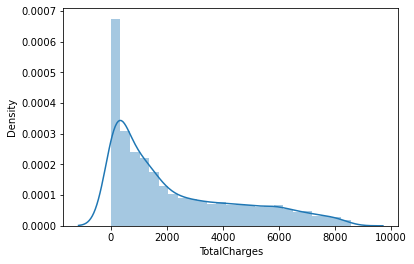

In [73]:
sns.distplot(df_copy['TotalCharges'])

<AxesSubplot:>

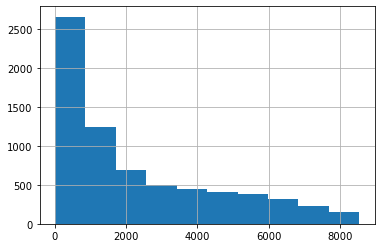

In [74]:
df_copy['TotalCharges'].hist(grid=True)

Observations:
    
    1.We can see that as Total charges increases the customer falling to those increased group decreases.

**Column 20: Churn**

<AxesSubplot:xlabel='Churn', ylabel='count'>

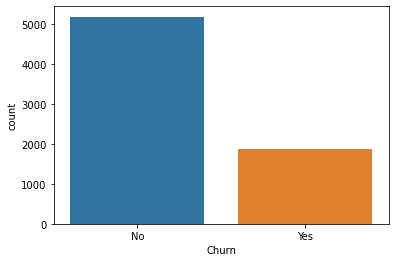

In [75]:
sns.countplot(df_copy['Churn'])

Observations:
    
    1.We can clearly see that there is an class imbalance.

In [76]:
le.fit(df_copy['Churn'])
label_Churn=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
df_copy['Churn']=le.fit_transform(df_copy['Churn'])

In [77]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40,1


In [78]:
df2=df_copy

In [79]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40,1


In [80]:
df2.shape

(7043, 20)

# Multivariate Analysis

In [81]:
from heatmap import heatmap,corrplot

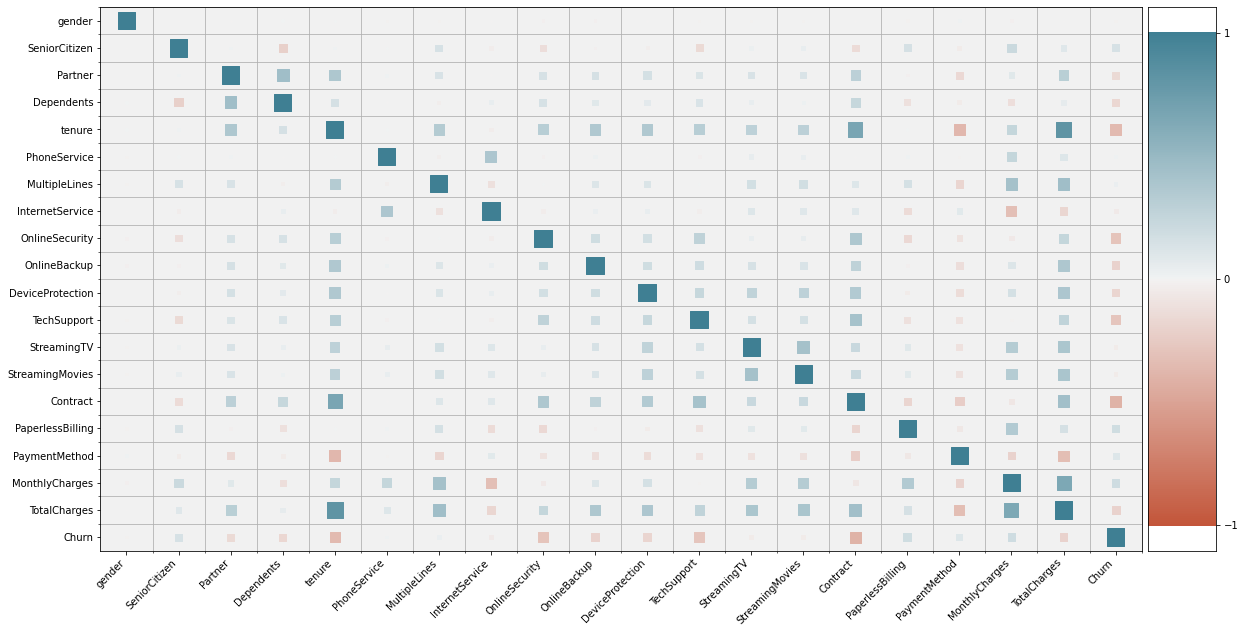

In [82]:
plt.figure(figsize=(20,10))
corrplot(df2.corr(),size_scale=300)
plt.show()

Observations:
    
    Lets list those independent variable which are highly correlated to our response/target variable.
    1.Tenure
    2.online security
    3.onlinebackup
    4.deviceprotection
    5.Techsupport
    6.contract
    7.paperlessbilling
    8.Total charges

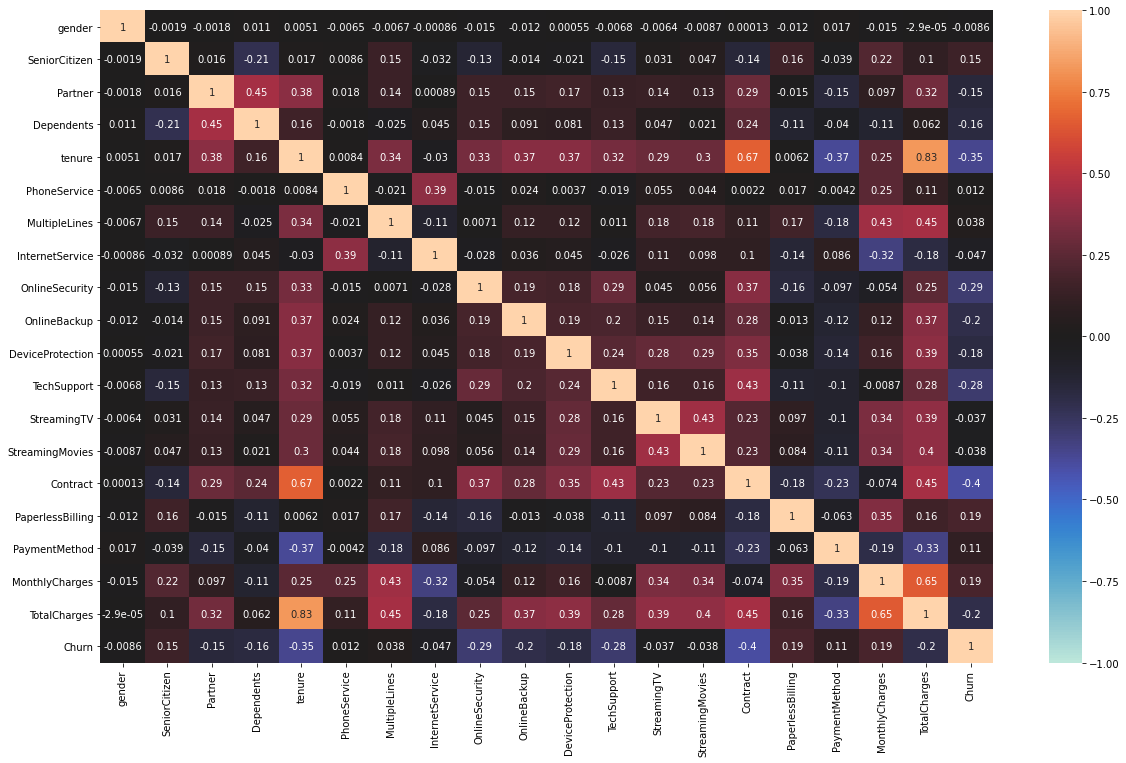

In [83]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    Lets list those independent varables which are correlated to each other.
    1.Contract vs tenure
    2.Total charges vs tenure
    3.online backup vs tenure
    4.total charges vs multiple lines
    5.Internet service and monthly charges
    6.contract vs online security
    7.contract vs online backup
    8.Total charges vs online backup
    9.Device protection vs streaming TV
    10.Device protection vs contract
    11.contract vs tech support
    12.Streaming tv vs total charges
    13.Contract vs total charges
    14.Paperlessbilling vs monthly charges

**Multivariate analysis by Grouping**

In [84]:
churn=df2.groupby('Churn')
churn_0=churn.get_group(0)
churn_1=churn.get_group(1)

In [85]:
churn_0.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.0
mean,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.918825,0.893893,0.939505,1.009857,0.998647,0.943371,1.004832,1.012949,0.889254,0.535562,1.505605,61.265124,2549.770883,0.0
std,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.945847,0.800728,0.850520,0.852612,0.852668,0.850786,0.852655,0.852571,0.857478,0.498782,1.118647,31.092648,2328.399619,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.100000,574.562500,0.0
50%,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,64.425000,1687.125000,0.0
75%,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,88.400000,4244.812500,0.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8550.000000,0.0


In [86]:
churn_1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,1.000535,0.814874,0.376137,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,74.441332,1531.608828,1.0
std,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.953692,0.521459,0.742044,0.891995,0.901663,0.755255,0.967135,0.967429,0.414714,0.433668,0.886617,24.666053,1886.774930,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,1.0
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,56.150000,137.900000,1.0
50%,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,79.650000,700.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,94.200000,2334.800000,1.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.350000,8481.600000,1.0


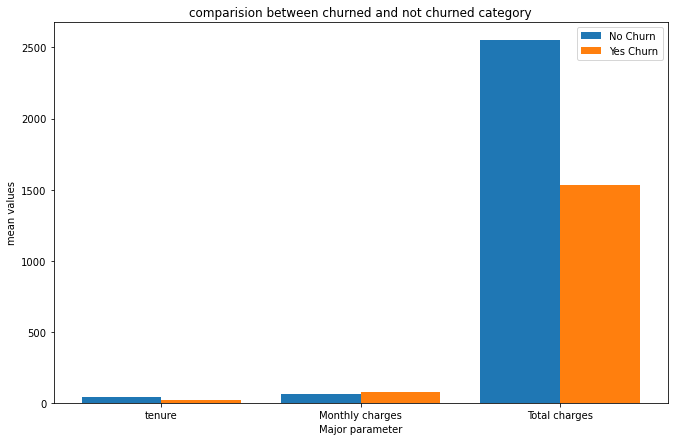

In [87]:
X =['tenure','Monthly charges','Total charges']
yp = [37.569965,61.265124,2549.770883]
yq = [17.979133,74.441332,1531.608828]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'No Churn')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Yes Churn')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision between churned and not churned category")
plt.legend()
plt.show()

Observations:
    
    1.From the above observations we can see that those people who are going to churn have low average tenure than other category.
    2.Those customers who are going to churn have high average monthly charges and low total charges.

# Bi variate analysis

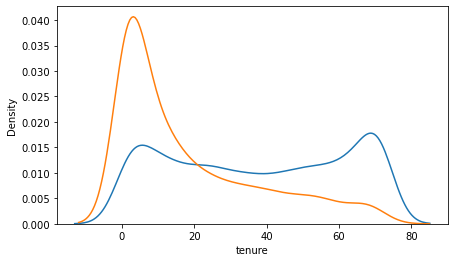

In [88]:
plt.figure(figsize=(7,4))
sns.distplot(churn_0['tenure'],hist=False,rug=False)
sns.distplot(churn_1['tenure'],hist=False,rug=False)
plt.show()

Observations:
    
    1.We can see that those people who are going churn will have tenure value ranging 0 to 20.

In [89]:
df2[(df2.Churn==1)&(df2.OnlineSecurity==0)].count()

gender              1461
SeniorCitizen       1461
Partner             1461
Dependents          1461
tenure              1461
PhoneService        1461
MultipleLines       1461
InternetService     1461
OnlineSecurity      1461
OnlineBackup        1461
DeviceProtection    1461
TechSupport         1461
StreamingTV         1461
StreamingMovies     1461
Contract            1461
PaperlessBilling    1461
PaymentMethod       1461
MonthlyCharges      1461
TotalCharges        1461
Churn               1461
dtype: int64

In [90]:
df2[(df2.Churn==1)&(df2.OnlineSecurity==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [91]:
df2[(df2.Churn==1)&(df2.OnlineSecurity==2)].count()

gender              295
SeniorCitizen       295
Partner             295
Dependents          295
tenure              295
PhoneService        295
MultipleLines       295
InternetService     295
OnlineSecurity      295
OnlineBackup        295
DeviceProtection    295
TechSupport         295
StreamingTV         295
StreamingMovies     295
Contract            295
PaperlessBilling    295
PaymentMethod       295
MonthlyCharges      295
TotalCharges        295
Churn               295
dtype: int64

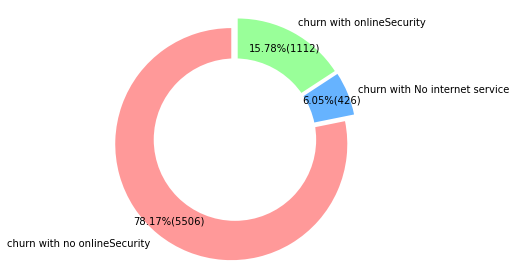

In [92]:
# Pie chart
labels = ['churn with no onlineSecurity', 'churn with No internet service', 'churn with onlineSecurity']
sizes = [1461,113,295]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Observations:
    
    If we consider online security,78.17% of churn category belongs to no onlinesecurity,15.78% belongs yes online security and 6.05% belongs to churn with no internet service.

In [93]:
df2[(df2.Churn==1)&(df2.OnlineBackup==0)].count()

gender              1233
SeniorCitizen       1233
Partner             1233
Dependents          1233
tenure              1233
PhoneService        1233
MultipleLines       1233
InternetService     1233
OnlineSecurity      1233
OnlineBackup        1233
DeviceProtection    1233
TechSupport         1233
StreamingTV         1233
StreamingMovies     1233
Contract            1233
PaperlessBilling    1233
PaymentMethod       1233
MonthlyCharges      1233
TotalCharges        1233
Churn               1233
dtype: int64

In [94]:
df2[(df2.Churn==1)&(df2.OnlineBackup==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [95]:
df2[(df2.Churn==1)&(df2.OnlineBackup==2)].count()

gender              523
SeniorCitizen       523
Partner             523
Dependents          523
tenure              523
PhoneService        523
MultipleLines       523
InternetService     523
OnlineSecurity      523
OnlineBackup        523
DeviceProtection    523
TechSupport         523
StreamingTV         523
StreamingMovies     523
Contract            523
PaperlessBilling    523
PaymentMethod       523
MonthlyCharges      523
TotalCharges        523
Churn               523
dtype: int64

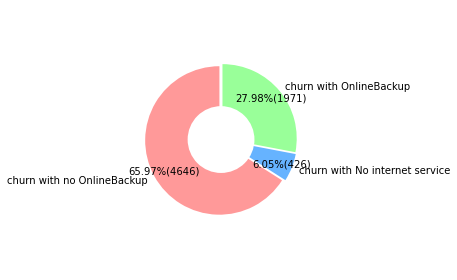

In [96]:
# Pie chart
labels = ['churn with no OnlineBackup', 'churn with No internet service', 'churn with OnlineBackup']
sizes = [1233,113,523]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors,radius=2,labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Observations:
    
    1.If we see OnlineBackup column we can observe 65.97% belongs to no OnlineBackup and got churned, and 27.98% with OnlineBackup and churned.

In [97]:
df2[(df2.Churn==1)&(df2.DeviceProtection==0)].count()

gender              1211
SeniorCitizen       1211
Partner             1211
Dependents          1211
tenure              1211
PhoneService        1211
MultipleLines       1211
InternetService     1211
OnlineSecurity      1211
OnlineBackup        1211
DeviceProtection    1211
TechSupport         1211
StreamingTV         1211
StreamingMovies     1211
Contract            1211
PaperlessBilling    1211
PaymentMethod       1211
MonthlyCharges      1211
TotalCharges        1211
Churn               1211
dtype: int64

In [98]:
df2[(df2.Churn==1)&(df2.DeviceProtection==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [99]:
df2[(df2.Churn==1)&(df2.DeviceProtection==2)].count()

gender              545
SeniorCitizen       545
Partner             545
Dependents          545
tenure              545
PhoneService        545
MultipleLines       545
InternetService     545
OnlineSecurity      545
OnlineBackup        545
DeviceProtection    545
TechSupport         545
StreamingTV         545
StreamingMovies     545
Contract            545
PaperlessBilling    545
PaymentMethod       545
MonthlyCharges      545
TotalCharges        545
Churn               545
dtype: int64

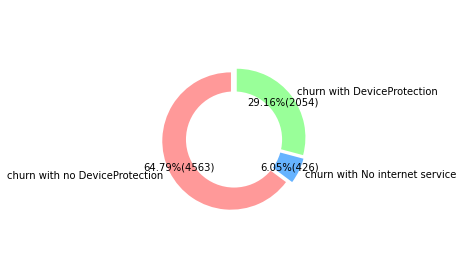

In [100]:
# Pie chart
labels = ['churn with no DeviceProtection', 'churn with No internet service', 'churn with DeviceProtection']
sizes = [1211,113,545]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors,radius=1,labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [101]:
df2[(df2.Churn==1)&(df2.TechSupport==0)].count()

gender              1446
SeniorCitizen       1446
Partner             1446
Dependents          1446
tenure              1446
PhoneService        1446
MultipleLines       1446
InternetService     1446
OnlineSecurity      1446
OnlineBackup        1446
DeviceProtection    1446
TechSupport         1446
StreamingTV         1446
StreamingMovies     1446
Contract            1446
PaperlessBilling    1446
PaymentMethod       1446
MonthlyCharges      1446
TotalCharges        1446
Churn               1446
dtype: int64

In [102]:
df2[(df2.Churn==1)&(df2.TechSupport==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [103]:
df2[(df2.Churn==1)&(df2.TechSupport==2)].count()

gender              310
SeniorCitizen       310
Partner             310
Dependents          310
tenure              310
PhoneService        310
MultipleLines       310
InternetService     310
OnlineSecurity      310
OnlineBackup        310
DeviceProtection    310
TechSupport         310
StreamingTV         310
StreamingMovies     310
Contract            310
PaperlessBilling    310
PaymentMethod       310
MonthlyCharges      310
TotalCharges        310
Churn               310
dtype: int64

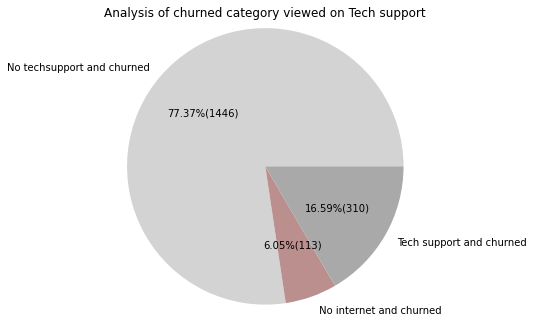

In [104]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No techsupport and churned',' No internet and churned','Tech support and churned']
value=[1446,113,310]
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on Tech support')
plt.show()

Observations:
    
    1.77.37% are belongs to no tech support and churned category followed by tech support and churned.

In [105]:
df2[(df2.Churn==1)&(df2.Contract==0)].count()

gender              1655
SeniorCitizen       1655
Partner             1655
Dependents          1655
tenure              1655
PhoneService        1655
MultipleLines       1655
InternetService     1655
OnlineSecurity      1655
OnlineBackup        1655
DeviceProtection    1655
TechSupport         1655
StreamingTV         1655
StreamingMovies     1655
Contract            1655
PaperlessBilling    1655
PaymentMethod       1655
MonthlyCharges      1655
TotalCharges        1655
Churn               1655
dtype: int64

In [106]:
df2[(df2.Churn==1)&(df2.Contract==1)].count()

gender              166
SeniorCitizen       166
Partner             166
Dependents          166
tenure              166
PhoneService        166
MultipleLines       166
InternetService     166
OnlineSecurity      166
OnlineBackup        166
DeviceProtection    166
TechSupport         166
StreamingTV         166
StreamingMovies     166
Contract            166
PaperlessBilling    166
PaymentMethod       166
MonthlyCharges      166
TotalCharges        166
Churn               166
dtype: int64

In [107]:
df2[(df2.Churn==1)&(df2.Contract==2)].count()

gender              48
SeniorCitizen       48
Partner             48
Dependents          48
tenure              48
PhoneService        48
MultipleLines       48
InternetService     48
OnlineSecurity      48
OnlineBackup        48
DeviceProtection    48
TechSupport         48
StreamingTV         48
StreamingMovies     48
Contract            48
PaperlessBilling    48
PaymentMethod       48
MonthlyCharges      48
TotalCharges        48
Churn               48
dtype: int64

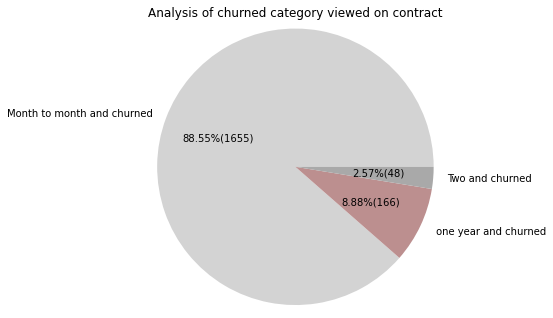

In [108]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Month to month and churned',' one year and churned','Two and churned']
value=[1655,166,48]
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

Observations:
    
    1.We can clearly see that 88.55% of those customers belongs to churned category is from month to month contract based, as the time period of the contract increases the churn will decrease.

In [109]:
df2[(df2.Churn==1)&(df2.PaperlessBilling==0)].count()

gender              469
SeniorCitizen       469
Partner             469
Dependents          469
tenure              469
PhoneService        469
MultipleLines       469
InternetService     469
OnlineSecurity      469
OnlineBackup        469
DeviceProtection    469
TechSupport         469
StreamingTV         469
StreamingMovies     469
Contract            469
PaperlessBilling    469
PaymentMethod       469
MonthlyCharges      469
TotalCharges        469
Churn               469
dtype: int64

In [110]:
df2[(df2.Churn==1)&(df2.PaperlessBilling==1)].count()

gender              1400
SeniorCitizen       1400
Partner             1400
Dependents          1400
tenure              1400
PhoneService        1400
MultipleLines       1400
InternetService     1400
OnlineSecurity      1400
OnlineBackup        1400
DeviceProtection    1400
TechSupport         1400
StreamingTV         1400
StreamingMovies     1400
Contract            1400
PaperlessBilling    1400
PaymentMethod       1400
MonthlyCharges      1400
TotalCharges        1400
Churn               1400
dtype: int64

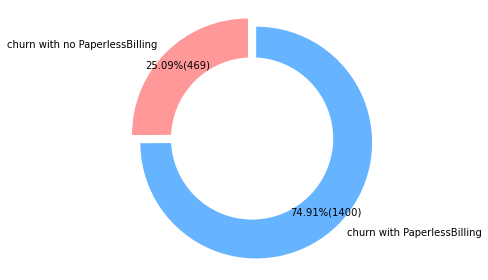

In [111]:
# Pie chart
labels = ['churn with no PaperlessBilling', 'churn with PaperlessBilling']
sizes = [469,1400]
#colors
colors = ['#ff9999','#66b3ff']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Observations:
    
    1.We can see that most of the churn is from paper less billing.

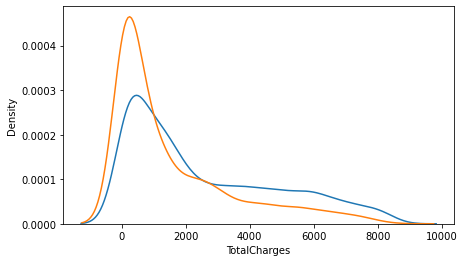

In [112]:
plt.figure(figsize=(7,4))
sns.distplot(churn_0['TotalCharges'],hist=False,rug=False)
sns.distplot(churn_1['TotalCharges'],hist=False,rug=False)
plt.show()

Observations:
    
    1.We can see that those customers who have churned will have total charges ranging from 0 to 1500.

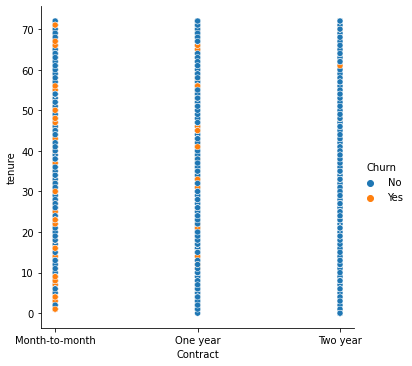

In [113]:
sns.relplot(x='Contract',y='tenure',data=df,hue='Churn')

In [114]:
contract=df2.groupby('Contract')
month_contract=contract.get_group(0)
year_contract=contract.get_group(1)
two_year_contract=contract.get_group(2)

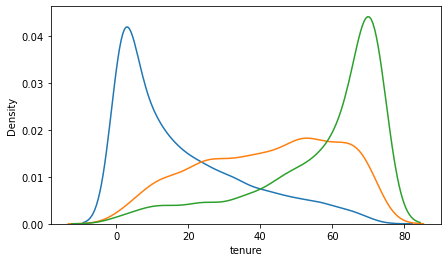

In [115]:
plt.figure(figsize=(7,4))
sns.distplot(month_contract['tenure'],hist=False,rug=False)
sns.distplot(year_contract['tenure'],hist=False,rug=False)
sns.distplot(two_year_contract['tenure'],hist=False,rug=False)
plt.show()

Observations:
    
    1.We can clearly see that if the contract is month to month then the maximum density of the tenure will be in range 0 to 20.
    2.We can observe that if the contract is two year wise then the maximum density of the tenure will be in range 60 to 80.

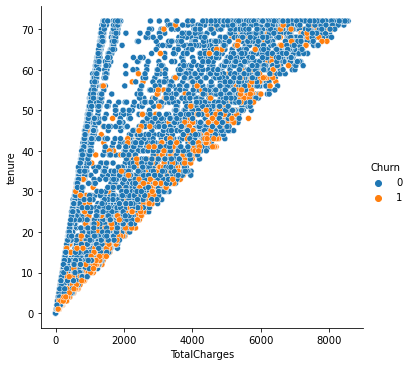

In [116]:
sns.relplot(x='TotalCharges',y='tenure',data=df2,hue='Churn')

Observations:
    
    1.We can clearly see that there is linear relation between tenure and Total charges.

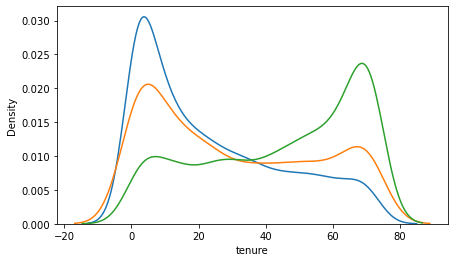

In [117]:
OnlineBackup=df2.groupby('OnlineBackup')
OnlineBackup_0=OnlineBackup.get_group(0)
OnlineBackup_1=OnlineBackup.get_group(1)
OnlineBackup_2=OnlineBackup.get_group(2)
plt.figure(figsize=(7,4))
sns.distplot(OnlineBackup_0['tenure'],hist=False,rug=False)
sns.distplot(OnlineBackup_1['tenure'],hist=False,rug=False)
sns.distplot(OnlineBackup_2['tenure'],hist=False,rug=False)
plt.show()

Observations:
    
    1.No online backup will have highest density for its tenure in the range of 0 to 20.
    2.Online backup will have highest density for its tenure in the range of 60 to 80.

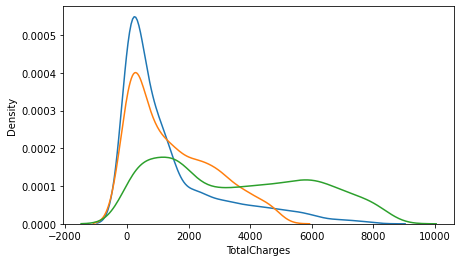

In [118]:
MultipleLines=df2.groupby('MultipleLines')
MultipleLines_0=MultipleLines.get_group(0)
MultipleLines_1=MultipleLines.get_group(1)
MultipleLines_2=MultipleLines.get_group(2)
plt.figure(figsize=(7,4))
sns.distplot(MultipleLines_0['TotalCharges'],hist=False,rug=False)
sns.distplot(MultipleLines_1['TotalCharges'],hist=False,rug=False)
sns.distplot(MultipleLines_2['TotalCharges'],hist=False,rug=False)
plt.show()

Observations:
    
    1.In the No multiple lines category majority of the Total charges will lie in the range 0 to 2000.
    2.In the No phone service category majority of the Total charges will lie in the range 0 to 2000.

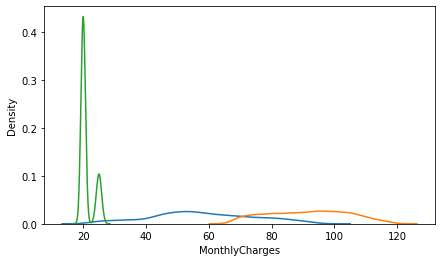

In [126]:
InternetService=df2.groupby('InternetService')
InternetService_DSL=InternetService.get_group(0)
InternetService_Optic=InternetService.get_group(1)
InternetService_No=InternetService.get_group(2)
plt.figure(figsize=(7,4))
sns.distplot(InternetService_DSL['MonthlyCharges'],hist=False,rug=False)
sns.distplot(InternetService_Optic['MonthlyCharges'],hist=False,rug=False)
sns.distplot(InternetService_No['MonthlyCharges'],hist=False,rug=False)
plt.show()

Observations:
    
    1.We can see that the monthly charges in those areas where internet facility is DSL varies from 0 to 100,and where internet is provided by optic fibre there the monthly charges ranges from 60 to 120 and where there are no internet facility there the monthly charges ranges from 0 to 30.

In [130]:
df2[(df2.Contract==0)&(df2.OnlineSecurity==0)].count()

gender              2631
SeniorCitizen       2631
Partner             2631
Dependents          2631
tenure              2631
PhoneService        2631
MultipleLines       2631
InternetService     2631
OnlineSecurity      2631
OnlineBackup        2631
DeviceProtection    2631
TechSupport         2631
StreamingTV         2631
StreamingMovies     2631
Contract            2631
PaperlessBilling    2631
PaymentMethod       2631
MonthlyCharges      2631
TotalCharges        2631
Churn               2631
dtype: int64

In [131]:
df2[(df2.Contract==0)&(df2.OnlineSecurity==1)].count()

gender              524
SeniorCitizen       524
Partner             524
Dependents          524
tenure              524
PhoneService        524
MultipleLines       524
InternetService     524
OnlineSecurity      524
OnlineBackup        524
DeviceProtection    524
TechSupport         524
StreamingTV         524
StreamingMovies     524
Contract            524
PaperlessBilling    524
PaymentMethod       524
MonthlyCharges      524
TotalCharges        524
Churn               524
dtype: int64

In [132]:
df2[(df2.Contract==0)&(df2.OnlineSecurity==2)].count()

gender              720
SeniorCitizen       720
Partner             720
Dependents          720
tenure              720
PhoneService        720
MultipleLines       720
InternetService     720
OnlineSecurity      720
OnlineBackup        720
DeviceProtection    720
TechSupport         720
StreamingTV         720
StreamingMovies     720
Contract            720
PaperlessBilling    720
PaymentMethod       720
MonthlyCharges      720
TotalCharges        720
Churn               720
dtype: int64

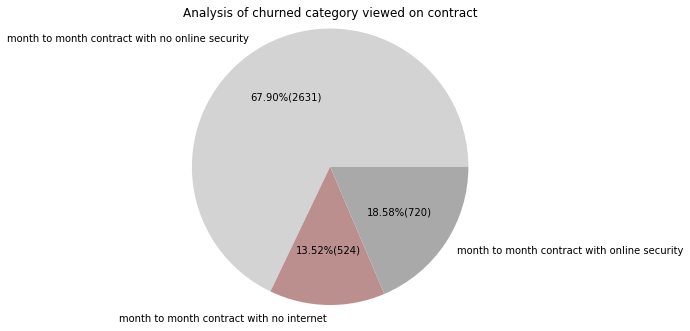

In [134]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['month to month contract with no online security', 'month to month contract with no internet','month to month contract with online security']
value = [2631,524,720]
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

Observations:
    
    1.67.8% of the month to month contract bassed customers dont have an online security

In [136]:
df2[(df2.Contract==1)&(df2.OnlineSecurity==0)].count()

gender              557
SeniorCitizen       557
Partner             557
Dependents          557
tenure              557
PhoneService        557
MultipleLines       557
InternetService     557
OnlineSecurity      557
OnlineBackup        557
DeviceProtection    557
TechSupport         557
StreamingTV         557
StreamingMovies     557
Contract            557
PaperlessBilling    557
PaymentMethod       557
MonthlyCharges      557
TotalCharges        557
Churn               557
dtype: int64

In [137]:
df2[(df2.Contract==1)&(df2.OnlineSecurity==1)].count()

gender              364
SeniorCitizen       364
Partner             364
Dependents          364
tenure              364
PhoneService        364
MultipleLines       364
InternetService     364
OnlineSecurity      364
OnlineBackup        364
DeviceProtection    364
TechSupport         364
StreamingTV         364
StreamingMovies     364
Contract            364
PaperlessBilling    364
PaymentMethod       364
MonthlyCharges      364
TotalCharges        364
Churn               364
dtype: int64

In [138]:
df2[(df2.Contract==1)&(df2.OnlineSecurity==2)].count()

gender              552
SeniorCitizen       552
Partner             552
Dependents          552
tenure              552
PhoneService        552
MultipleLines       552
InternetService     552
OnlineSecurity      552
OnlineBackup        552
DeviceProtection    552
TechSupport         552
StreamingTV         552
StreamingMovies     552
Contract            552
PaperlessBilling    552
PaymentMethod       552
MonthlyCharges      552
TotalCharges        552
Churn               552
dtype: int64

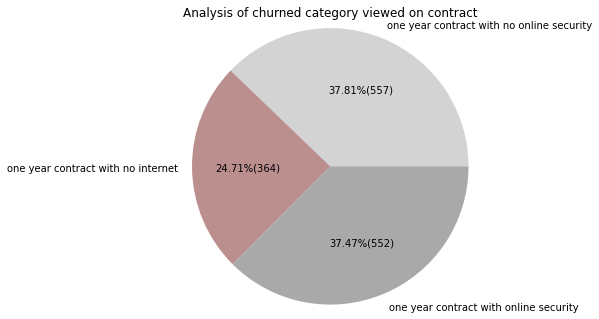

In [139]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['one year contract with no online security', 'one year contract with no internet','one year contract with online security']
value = [557,364,552]
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

Observations:
    
    1.In one year contract customers those who are with online security and without both are equal in number.

In [140]:
df2[(df2.Contract==2)&(df2.OnlineSecurity==0)].count()

gender              310
SeniorCitizen       310
Partner             310
Dependents          310
tenure              310
PhoneService        310
MultipleLines       310
InternetService     310
OnlineSecurity      310
OnlineBackup        310
DeviceProtection    310
TechSupport         310
StreamingTV         310
StreamingMovies     310
Contract            310
PaperlessBilling    310
PaymentMethod       310
MonthlyCharges      310
TotalCharges        310
Churn               310
dtype: int64

In [141]:
df2[(df2.Contract==2)&(df2.OnlineSecurity==1)].count()

gender              638
SeniorCitizen       638
Partner             638
Dependents          638
tenure              638
PhoneService        638
MultipleLines       638
InternetService     638
OnlineSecurity      638
OnlineBackup        638
DeviceProtection    638
TechSupport         638
StreamingTV         638
StreamingMovies     638
Contract            638
PaperlessBilling    638
PaymentMethod       638
MonthlyCharges      638
TotalCharges        638
Churn               638
dtype: int64

In [142]:
df2[(df2.Contract==2)&(df2.OnlineSecurity==2)].count()

gender              747
SeniorCitizen       747
Partner             747
Dependents          747
tenure              747
PhoneService        747
MultipleLines       747
InternetService     747
OnlineSecurity      747
OnlineBackup        747
DeviceProtection    747
TechSupport         747
StreamingTV         747
StreamingMovies     747
Contract            747
PaperlessBilling    747
PaymentMethod       747
MonthlyCharges      747
TotalCharges        747
Churn               747
dtype: int64

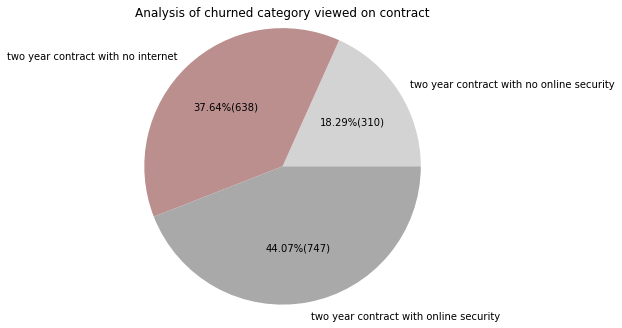

In [143]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['two year contract with no online security', 'two year contract with no internet','two year contract with online security']
value = [310,638,747]
colors = ['lightgrey','rosybrown','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

Observations:
    
    1.We can see that as contract period increases the online security is also increases.

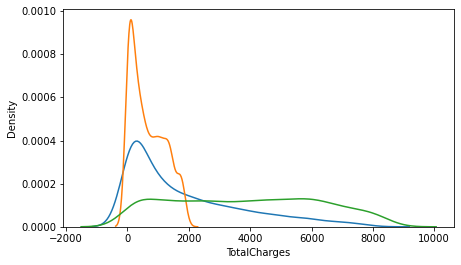

In [150]:
OnlineBackup=df2.groupby('OnlineBackup')
OnlineBackup_0=OnlineBackup.get_group(0)
OnlineBackup_1=OnlineBackup.get_group(1)
OnlineBackup_2=OnlineBackup.get_group(2)
plt.figure(figsize=(7,4))
sns.distplot(OnlineBackup_0['TotalCharges'],hist=False,rug=False)
sns.distplot(OnlineBackup_1['TotalCharges'],hist=False,rug=False)
sns.distplot(OnlineBackup_2['TotalCharges'],hist=False,rug=False)
plt.show()

Observations:
    
    1.From the above observations we can conclude that those customers who are with no online backup will have total charges ranging from 0 to 8000,but highest density we can observe in 0 to 200 range.
    2.Those customers who are with no internet facility have total charges ranging from 0 to 2000,
    3.Those customers who are adequated with online backup will have total charges ranging from 0 to 9000 in almost uniform frequency.

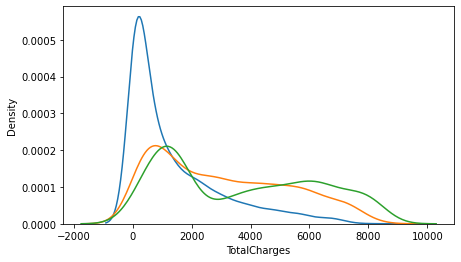

In [151]:
Contract=df2.groupby('Contract')
Contract_0=Contract.get_group(0)
Contract_1=Contract.get_group(1)
Contract_2=Contract.get_group(2)
plt.figure(figsize=(7,4))
sns.distplot(Contract_0['TotalCharges'],hist=False,rug=False)
sns.distplot(Contract_1['TotalCharges'],hist=False,rug=False)
sns.distplot(Contract_2['TotalCharges'],hist=False,rug=False)
plt.show()

Observations:
    
    1.From the above graph we can see that one year and two year contract behaves same way with total charges.
    2.Month to month contract will have total charges ranging from 0 to 4000 in an significant density.

# Data cleaning

In [153]:
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [154]:
k=df2.applymap(np.isreal)

In [155]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

gender
True    7043
Name: gender, dtype: int64


SeniorCitizen
True    7043
Name: SeniorCitizen, dtype: int64


Partner
True    7043
Name: Partner, dtype: int64


Dependents
True    7043
Name: Dependents, dtype: int64


tenure
True    7043
Name: tenure, dtype: int64


PhoneService
True    7043
Name: PhoneService, dtype: int64


MultipleLines
True    7043
Name: MultipleLines, dtype: int64


InternetService
True    7043
Name: InternetService, dtype: int64


OnlineSecurity
True    7043
Name: OnlineSecurity, dtype: int64


OnlineBackup
True    7043
Name: OnlineBackup, dtype: int64


DeviceProtection
True    7043
Name: DeviceProtection, dtype: int64


TechSupport
True    7043
Name: TechSupport, dtype: int64


StreamingTV
True    7043
Name: StreamingTV, dtype: int64


StreamingMovies
True    7043
Name: StreamingMovies, dtype: int64


Contract
True    7043
Name: Contract, dtype: int64


PaperlessBilling
True    7043
Name: PaperlessBilling, dtype: int64


PaymentMethod
True    7043
Name: Payme

Observations:
    
    1.From the above observations we can say that there are no null values.

# Removal of outliers

# zscore method

In [156]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df3=df2[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df2.shape[0]-df3.shape[0])/df2.shape[0])

percentage of loss of data by zscore is : 0.09683373562402385


**Accuracy and f1 score before removal of outliers**

In [158]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.814
classification report is
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1196
           1       0.66      0.58      0.62       424

    accuracy                           0.81      1620
   macro avg       0.76      0.74      0.75      1620
weighted avg       0.81      0.81      0.81      1620

confusion matrix is
[[1072  124]
 [ 178  246]]




**Accuracy and f1 score after removal of outliers**

In [159]:
x=df3.drop('Churn',axis=1)
y=df3['Churn']
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.781
classification report is
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1055
           1       0.63      0.54      0.58       409

    accuracy                           0.78      1464
   macro avg       0.73      0.71      0.72      1464
weighted avg       0.77      0.78      0.78      1464

confusion matrix is
[[924 131]
 [189 220]]




Observations:
    
    1.From the above observations we can say that there is no need to remove the outliers because most of the columns are of categorical type and moreover by remiving the outliers the accuracy and f1 score both will go down.

# Splitting the variables

In [160]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']

# Removal of skewness

In [161]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.960637
dtype: float64

Observations:
    
    1.There is no need to check skewness for the categorical columns and hence skewness is under the limits.

# Using Over sampling and smote techniques for class imbalance problem

In [162]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_sample(x,y)

**Accuracy and f1 score through over sampling models**

In [163]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.801
classification report is
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1175
           1       0.79      0.83      0.81      1206

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381

confusion matrix is
[[911 264]
 [210 996]]




**Accuracy and f1 score through smote**

In [164]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.792
classification report is
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1175
           1       0.78      0.82      0.80      1206

    accuracy                           0.79      2381
   macro avg       0.79      0.79      0.79      2381
weighted avg       0.79      0.79      0.79      2381

confusion matrix is
[[900 275]
 [221 985]]




Observations:
    
    1.From the above observations we can say that x_over and y_over produces good acccuracy as well as f1 scores

# Checking accuracy through standard scaling

In [165]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x_over)

In [166]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_over,test_size=0.23,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1175
           1       0.78      0.84      0.81      1206

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381

confusion matrix is
[[ 891  284]
 [ 193 1013]]




Observations:
    
    1.Not a significant results, so we can proceed further using x_over and y_over techniques.

# Building the model

In [167]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [168]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8190016103059581 on random state 59


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=59)

In [170]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.816
classification report is
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1532
           1       0.80      0.84      0.82      1573

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105

confusion matrix is
[[1206  326]
 [ 246 1327]]




In [171]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.791
classification report is
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1532
           1       0.77      0.83      0.80      1573

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

confusion matrix is
[[1151  381]
 [ 268 1305]]




In [172]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.646
classification report is
              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1532
           1       0.69      0.55      0.61      1573

    accuracy                           0.65      3105
   macro avg       0.65      0.65      0.64      3105
weighted avg       0.65      0.65      0.64      3105

confusion matrix is
[[1134  398]
 [ 701  872]]




In [173]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.778
classification report is
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1532
           1       0.78      0.78      0.78      1573

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

confusion matrix is
[[1193  339]
 [ 351 1222]]




In [174]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.78
classification report is
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1532
           1       0.75      0.84      0.79      1573

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

confusion matrix is
[[1099  433]
 [ 250 1323]]




In [175]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.831
classification report is
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1532
           1       0.81      0.87      0.84      1573

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

confusion matrix is
[[1213  319]
 [ 205 1368]]




In [176]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.845
classification report is
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1532
           1       0.85      0.84      0.85      1573

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

confusion matrix is
[[1305  227]
 [ 255 1318]]




# Cross validation scores

In [177]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x_over,y_over,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.793


GaussianNB() score is:
0.778


SVC() score is:
0.659


DecisionTreeClassifier() score is:
0.781


KNeighborsClassifier() score is:
0.782


AdaBoostClassifier() score is:
0.811


RandomForestClassifier() score is:
0.837




# Finding the best model

The difference between accuracy score and cross val score are:
    
    Model         difference         f1scores
    1.lg          0.023              0.81/0.82
    2.gnb         0.013              0.78/0.8
    3.svc        -0.013              0.67/0.61
    4.dtc        -0.003              0.78/0.78
    5.knn        -0.002              0.76/0.79
    6.add         0.02               0.82/0.84
    7.rf          0.008              0.84/0.85

**The best model is random forest classifier because it has got least difference as well as highest f1 score.**

# Hyper parameter tuning

In [178]:
grid_param={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'class_weight':['balanced_subsample','balanced']
    
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x_over,y_over)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': True}
0.8402700083823079


In [179]:
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',bootstrap=True,oob_score=True,class_weight='balanced_subsample')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.847
classification report is
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1532
           1       0.86      0.84      0.85      1573

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

confusion matrix is
[[1310  222]
 [ 254 1319]]




Observations:
    
    The maximum accuracy we got through least overfitting and with highest f1 score is 0.847

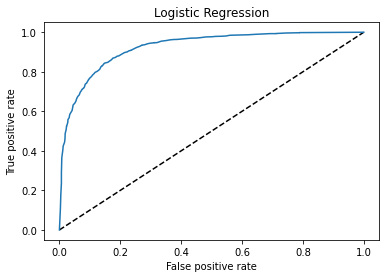

0.8468082475321972

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:
    
    1.The auc_roc score for this particular model is 0.846, suggesting that model is going to perform better.

# Saving the model

In [181]:
import joblib
joblib.dump(rf1,'customerchurnrf.obj')

['customerchurnrf.obj']